In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [2]:
!conda env list

# conda environments:
#
GoogEarthEngine          /home/jp/miniconda2/envs/GoogEarthEngine
astroconda               /home/jp/miniconda2/envs/astroconda
everest-pipeline         /home/jp/miniconda2/envs/everest-pipeline
helios                   /home/jp/miniconda2/envs/helios
iraf27                   /home/jp/miniconda2/envs/iraf27
ircs_pol                 /home/jp/miniconda2/envs/ircs_pol
moscatel                 /home/jp/miniconda2/envs/moscatel
radmc3dpy                /home/jp/miniconda2/envs/radmc3dpy
root                  *  /home/jp/miniconda2



# Dipper (sub-)list

The links below show the quick look lightcurve reduced using a K2 data pipeline called [K2SFF](https://archive.stsci.edu/prepds/k2sff/) available online.

* [EPIC203824153](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203824153.html)
* [EPIC203937317](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203937317.html)
* [EPIC204278916](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204278916.html)
* [EPIC204469637](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204469637.html)
* [EPIC204514548](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204514548.html)
* [EPIC204630363](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204630363.html)
* [EPIC204638512](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204638512.html)
* [EPIC205151387](https://www.cfa.harvard.edu/~avanderb/k2c2/ep205151387.html)
* [EPIC203384911](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203843911.html)

## Corrected lightcurves from Vanderburg website

* [campaign 2](https://www.cfa.harvard.edu/~avanderb/k2c2/)

The advantage of this approach over using everest-pipeline is that direct download of corrected lightcurve is possible, making analysis relatively quickly. Take caution however that the pipeline might remove inherent variability in the dipper lightcurve so study how the pipeline exactly does the correction. 

In [3]:
epics='''203824153
203937317
204278916
204469637
204514548
204630363
204638512
205151387
203843911'''.split('\n')

In [4]:
import pandas as pd

campaign=str(2)
epic = '203824153'

part1='http://archive.stsci.edu/missions/hlsp/k2sff/c0'
part2='00000/'
part3='/hlsp_k2sff_k2_lightcurve_'
part4='_kepler_v1_llc-default-aper.txt'

url=part1+campaign+'/'+epic[:4]+part2+epic[-5:]+part3+epic+'-c0'+campaign+part4

#
df = pd.read_csv(url, sep=",", header=0, index_col=False)
df.head()

,BJD - 2454833,Corrected Flux
0,2061.305881,1.127189
1,2061.326313,1.126225
2,2061.346746,1.126394
3,2061.367178,1.124251
4,2061.387610,1.126310


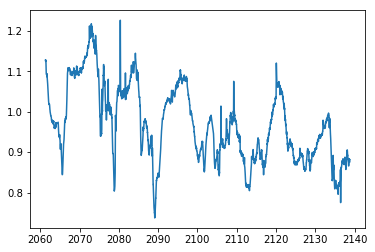

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df[df.columns[0]], df[df.columns[1]])

## Download all

* DF is a dictionary of dataframes
* df is a merged DF

* DF1 has no index while DF2 has the time (BJD) as index
* df2 is a merged DF2

In [6]:
import pandas as pd

campaign=str(2)
part1='http://archive.stsci.edu/missions/hlsp/k2sff/c0'
part2='00000/'
part3='/hlsp_k2sff_k2_lightcurve_'
part4='_kepler_v1_llc-default-aper.txt'


DF = {}
for epic in epics:
    try:
        url=part1+campaign+'/'+epic[:4]+part2+epic[-5:]+part3+epic+'-c0'+campaign+part4
        print('downloading: {}'.format(epic))
        #save in dict
        DF[epic] = pd.read_csv(url, sep=",", header=0, index_col=False)
        #save locally as csv
        fname=epic+'_lc_vanderburg.csv'
        DF[epic].to_csv(fname)
    except Exception as e:
        print('{0}: {1}'.format(epic, e))

downloading: 203824153
downloading: 203937317
downloading: 204278916
downloading: 204469637
downloading: 204514548
downloading: 204630363
downloading: 204638512
downloading: 205151387
downloading: 203843911


In [7]:
DF.keys()

['204630363',
 '203937317',
 '204469637',
 '204278916',
 '203824153',
 '205151387',
 '204638512',
 '204514548',
 '203843911']

In [8]:
ep363=DF[DF.keys()[0]]
ep363.head()

,BJD - 2454833,Corrected Flux
0,2061.305537,1.009036
1,2061.325969,1.009801
2,2061.346401,1.010715
3,2061.366833,1.011483
4,2061.387265,1.011459


combine into one dataframe

In [9]:
frames = []
for key in DF.keys():
    frames.append(DF[key])
    
df = pd.concat(frames, axis=1)
df.columns

Index([u'BJD - 2454833', u' Corrected Flux', u'BJD - 2454833',
       u' Corrected Flux', u'BJD - 2454833', u' Corrected Flux',
       u'BJD - 2454833', u' Corrected Flux', u'BJD - 2454833',
       u' Corrected Flux', u'BJD - 2454833', u' Corrected Flux',
       u'BJD - 2454833', u' Corrected Flux', u'BJD - 2454833',
       u' Corrected Flux', u'BJD - 2454833', u' Corrected Flux'],
      dtype='object')

In [10]:
DF.keys()

['204630363',
 '203937317',
 '204469637',
 '204278916',
 '203824153',
 '205151387',
 '204638512',
 '204514548',
 '203843911']

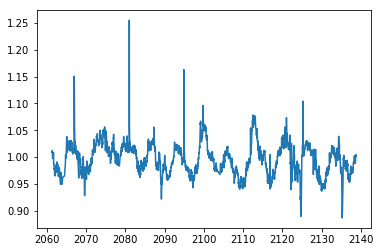

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ep363[ep363.columns[0]], ep363[ep363.columns[1]])

setting date as index

In [12]:
DF2 = {}
for key in DF.keys():
    DF2[key] = DF[key].set_index(keys=DF[key].columns[0])
    DF2[key].columns = [key]

In [13]:
DF2.keys()

['204630363',
 '203937317',
 '204469637',
 '204278916',
 '203824153',
 '205151387',
 '204638512',
 '204514548',
 '203843911']

In [14]:
frames2 = []
for key in DF2.keys():
    frames2.append(DF2[key])
    
df2 = pd.concat(frames2, axis=1)
df2.columns

Index([u'204630363', u'203937317', u'204469637', u'204278916', u'203824153',
       u'205151387', u'204638512', u'204514548', u'203843911'],
      dtype='object')

In [15]:
for key in df2.columns:
    print('{0}: {1}'.format(key, len(df2[str(key)].dropna())))

204630363: 3246
203937317: 3253
204469637: 3307
204278916: 3302
203824153: 3210
205151387: 3307
204638512: 3263
204514548: 3225
203843911: 3241


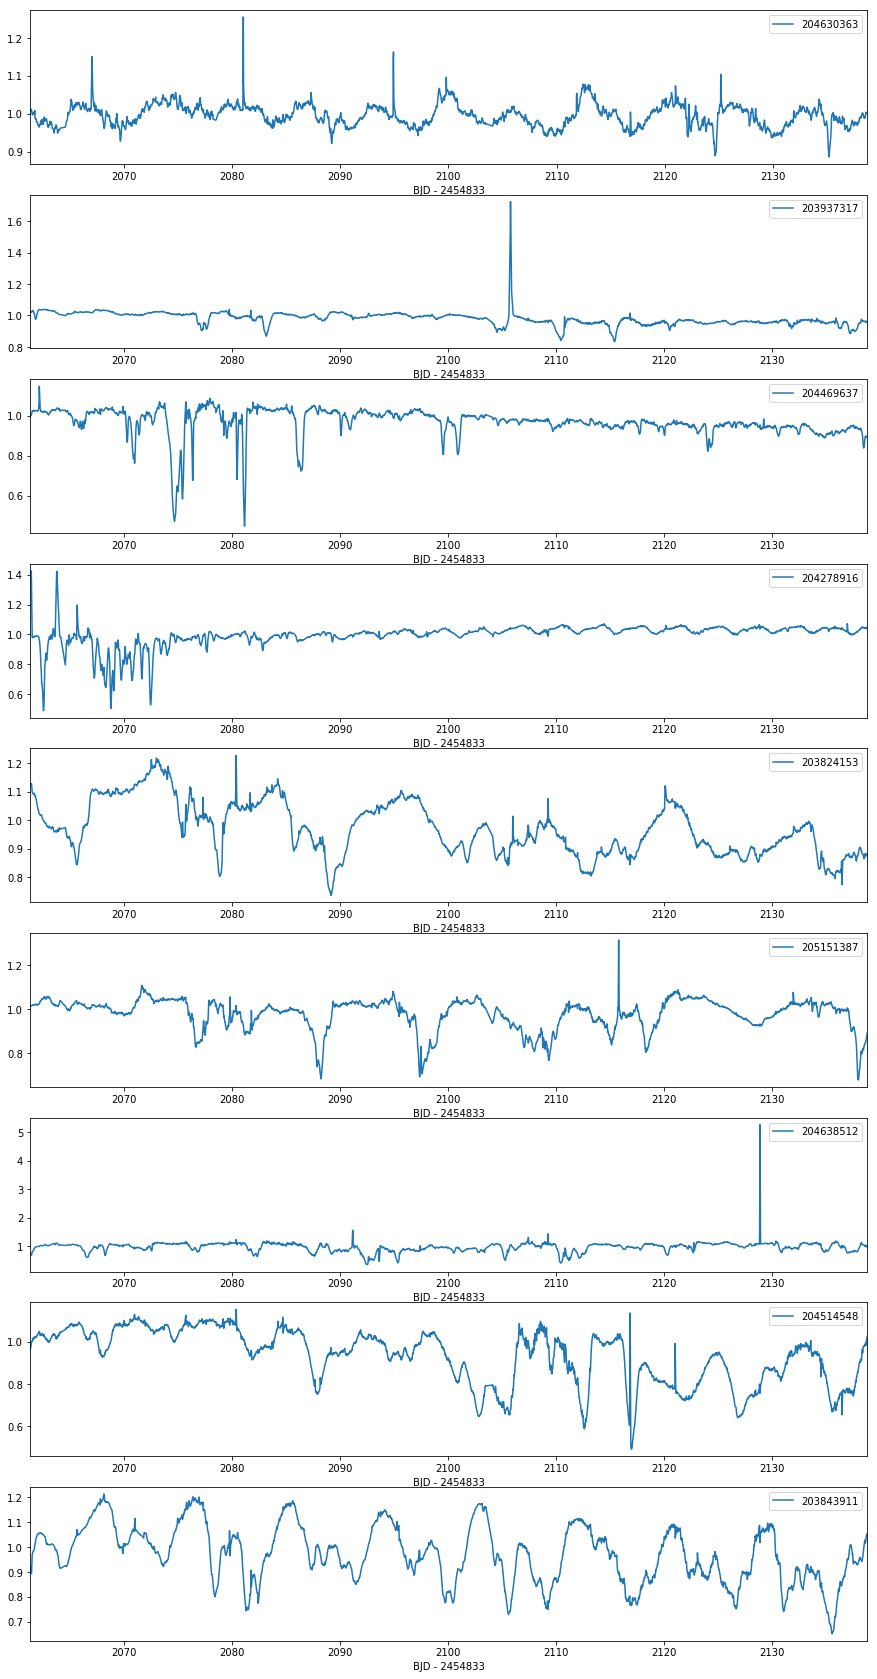

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=len(df2.columns),ncols=1, figsize=(15,30))
for i,j in enumerate(df2.columns):
    df2[str(j)].dropna().plot(ax=ax[i], legend=True)

## Comparison with lightcurve downloaded using everest-pipeline

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#load csv
df1 = pd.read_csv('data/203843911.csv', index_col=0)
df2 = pd.read_csv('data/203824153.csv', index_col=0)
df3 = pd.read_csv('data/203937317.csv', index_col=0)
df4 = pd.read_csv('data/204278916.csv', index_col=0)
df5 = pd.read_csv('data/204469637.csv', index_col=0)
df6 = pd.read_csv('data/204514548.csv', index_col=0)
df7 = pd.read_csv('data/204630363.csv', index_col=0)
df8 = pd.read_csv('data/204638512.csv', index_col=0)
df9 = pd.read_csv('data/205151387.csv', index_col=0)

df1.head()

,EPIC153
2060.284270,6223.242905
2060.304702,6236.089386
2060.325134,6259.457610
2060.345567,6282.849649
2060.365999,6256.764671


In [18]:
#concatenate
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
df = pd.concat(frames, axis=1)

#remove negative fluxes
df[df>0].head()

,EPIC153,EPIC317,EPIC916,EPIC548,EPIC637,EPIC363,EPIC512,EPIC387,EPIC911
2060.283697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2060.283812,NaN,NaN,16272.938683,NaN,NaN,NaN,NaN,NaN,NaN
2060.283833,NaN,NaN,NaN,NaN,NaN,NaN,281413.744662,NaN,NaN
2060.283854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79271.369015,NaN
2060.283931,NaN,NaN,NaN,NaN,NaN,122254.585294,NaN,NaN,NaN


There are uneven cadence in each dipper above but their difference is quite small.

How many data points per target after removing NaN in each?

In [19]:
for key in df.columns:
    print('{0}: {1}'.format(key, len(df[str(key)].dropna())))

EPIC153: 3811
EPIC317: 3811
EPIC916: 3811
EPIC548: 3811
EPIC637: 3811
EPIC363: 3811
EPIC512: 3811
EPIC387: 3811
EPIC911: 3811


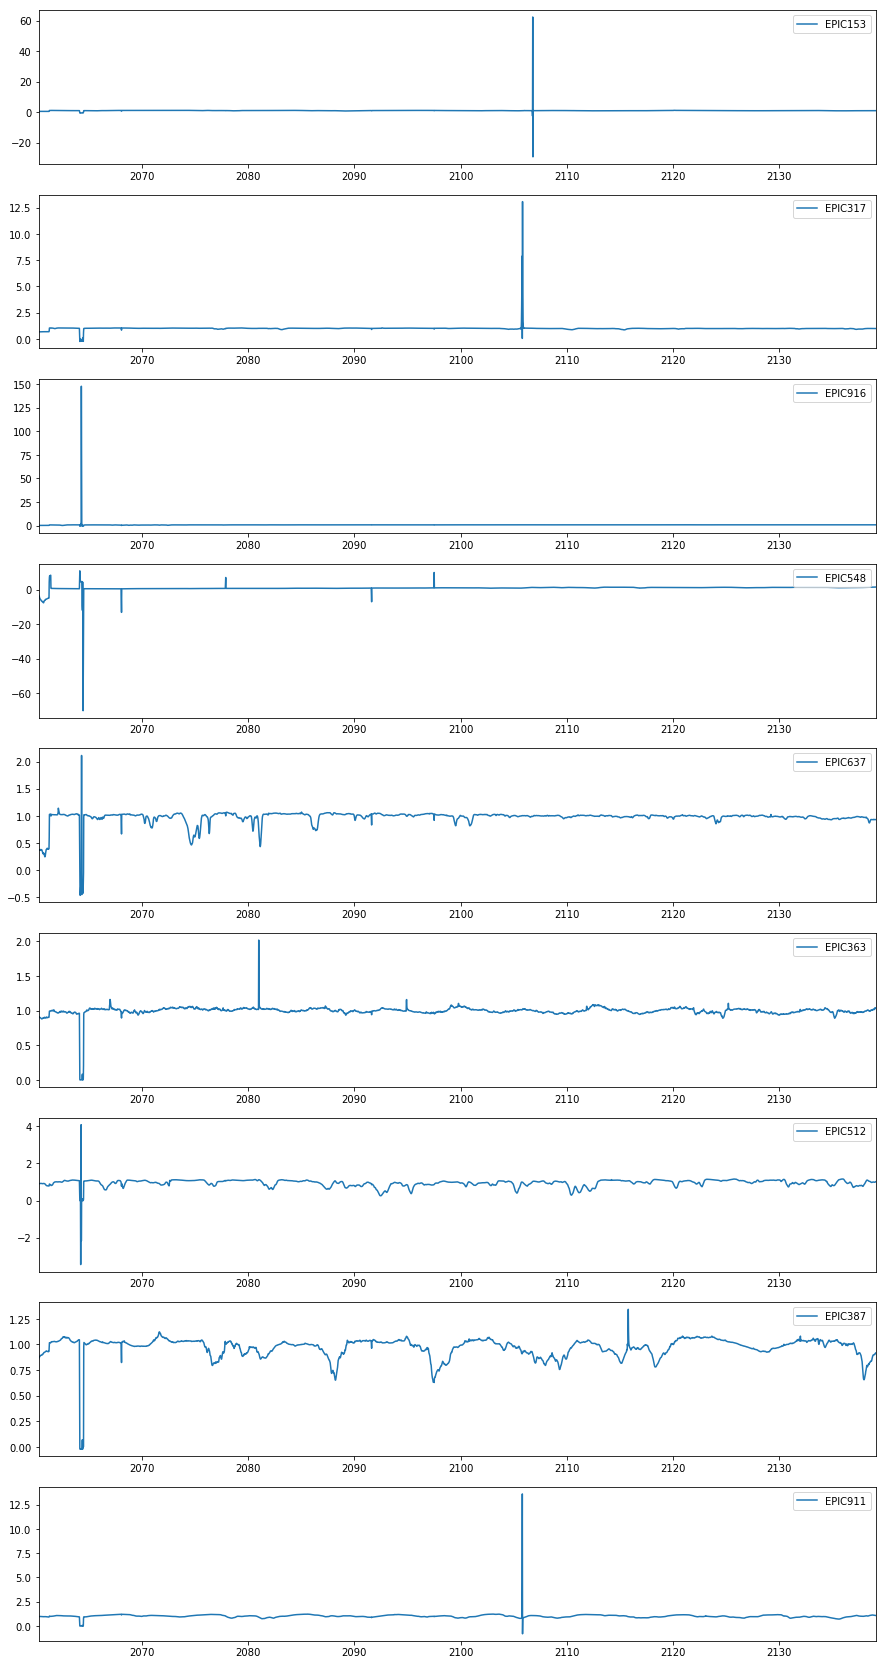

In [20]:
import numpy as np

#df[df>0].plot(subplots=True, figsize=(15,30));

#colormap = plt.cm.Dark2.colors 
fig, ax = plt.subplots(nrows=len(df.columns),ncols=1, figsize=(15,30))
for i,j in enumerate(df.columns):
    df[str(j)].dropna().apply(lambda x: x/np.nanmedian(df[str(j)])).plot(ax=ax[i], legend=True)

## Summary

The lightcurves downloaded from Vanderburg (V) is qualitatively better than that from everest-pipeline (E), because: 

* V can be downloaded directly whereas E cannot bypass downloading target pixel files
* V has less outliers than E (the normalized flux is far from 1)